# Testing

* **Products used:** 


### Background 

### Description


***

## Getting started


### Load packages
Load key Python packages and any supporting functions for the analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
import xarray as xr
from sklearn.metrics import mean_absolute_error

### Analysis parameters


In [2]:
path = 'results/ndvi_ls8_s2.csv' 

In [3]:
df = pd.read_csv(path).drop('Unnamed: 0', axis=1)

### 1:1 plots

In [4]:
x=df['NDVI_s2'].values
y=df['NDVI_ls8'].values

s, i, r, p, sd, = stats.linregress(x, y)
mae = mean_absolute_error(x,y)

linear eq: NDVI_LS8 = 0.929*NDVI_S2 + 0.039
MAE:  0.047




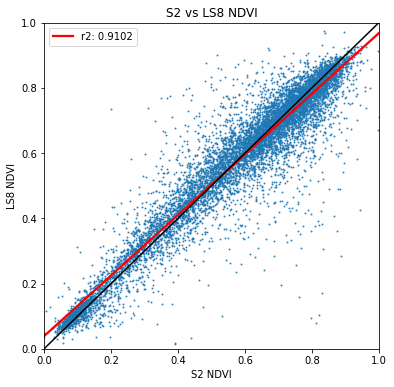

In [5]:
print(f'linear eq: NDVI_LS8 = {s:.3f}*NDVI_S2 + {i:.3f}')
print("MAE: ", round(mae, 3))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x, y=y, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,4)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('S2 NDVI')
ax.set_ylabel('LS8 NDVI')
ax.set_title('S2 vs LS8 NDVI');

### Harmonize Landsat 8 with Sentinel-2 using Chastain et. al 2019

https://www.sciencedirect.com/science/article/pii/S0034425718305212?via%3Dihub

In [6]:
# multiplying the red band with slope and adding to intercept
slope = 1.0524
intercept = -0.00151
df['red_chastain_s2']  = (df['red_s2']  - intercept) / slope

In [7]:
slope = 1.0283
intercept = -0.0021
df['nir_chastain_s2']  = (df['nir_s2']  - intercept) / slope

In [8]:
df['ndvi_chastain_s2'] = (
    (df['nir_chastain_s2']-df['red_chastain_s2'])
    /
    (df['nir_chastain_s2']+df['red_chastain_s2'])
)

In [9]:
x1=df['ndvi_chastain_s2'].values

In [10]:
s, i, r, p, sd, = stats.linregress(x1, y)
mae = mean_absolute_error(x1, y)

linear eq: NDVI_LS8 = 0.940*ndvi_chastain_s2 + 0.026
MAE:  0.046




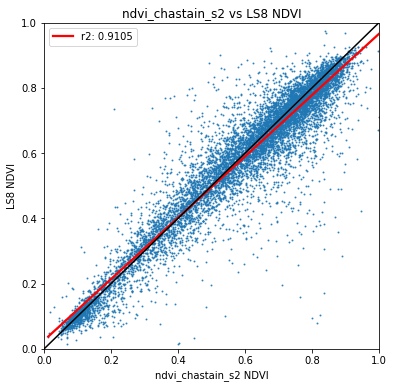

In [11]:
print(f'linear eq: NDVI_LS8 = {s:.3f}*ndvi_chastain_s2 + {i:.3f}')
print("MAE: ", round(mae, 3))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x1, y=y, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,4)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('ndvi_chastain_s2 NDVI')
ax.set_ylabel('LS8 NDVI')
ax.set_title('ndvi_chastain_s2 vs LS8 NDVI');

### Harmonize Landsat 8 with Sentinel-2 using Claverie et. al 2018

https://www.sciencedirect.com/science/article/pii/S0034425718304139

In [12]:
# multiplying the red band with slope and adding to intercept
slope = 0.982
intercept = 0.00094
df['red_claverie']  = (df['red_s2'] * slope) + intercept

In [13]:
# multiplying the nir band with slope and adding to intercept
slope = 1.001
intercept = -0.00029
df['nir_claverie']  = (df['nir_s2'] * slope) + intercept

In [14]:
df['ndvi_claverie_s2'] = ((df['nir_claverie']-df['red_claverie'])
                       /
                       (df['nir_claverie']+df['red_claverie'])
                      )

In [15]:
x2=df['ndvi_claverie_s2'].values

In [16]:
s, i, r, p, sd, = stats.linregress(x2, y)
mae = mean_absolute_error(x2, y)

linear eq: NDVI_LS8 = 0.938*NDVI_chastain + 0.028
MAE:  0.046




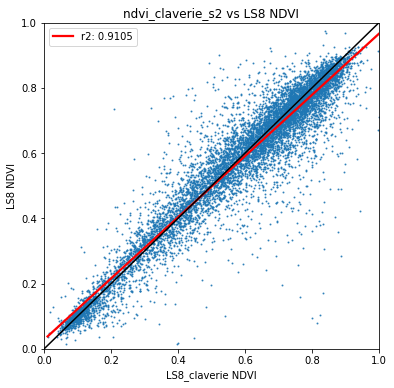

In [17]:
print(f'linear eq: NDVI_LS8 = {s:.3f}*NDVI_chastain + {i:.3f}')
print("MAE: ", round(mae, 3))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x2, y=y, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,4)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('LS8_claverie NDVI')
ax.set_ylabel('LS8 NDVI')
ax.set_title('ndvi_claverie_s2 vs LS8 NDVI');

## Harmonize Landsat 8 with Sentinel-2 using Austrilia Co-effiecent

Flood et al

In [18]:
slope = 0.9895
intercept = 0.0027
df['red_aus']  = (df['red_s2'] * slope) + intercept

In [19]:
slope = 1.0129
intercept = 0.0147
df['nir_aus']  = (df['nir_s2'] * slope) + intercept

In [20]:
df['ndvi_aus_s2'] = (
    (df['nir_aus']-df['red_aus'])
                           /
                           (df['nir_aus']+df['red_aus'])
)

In [21]:
x3=df['ndvi_aus_s2'].values

In [22]:
s, i, r, p, sd, = stats.linregress(x3, y)
mae = mean_absolute_error(x3, y)

linear eq: NDVI_LS8 = 0.940*ndvi_aus_s2 + 0.026
MAE:  0.046




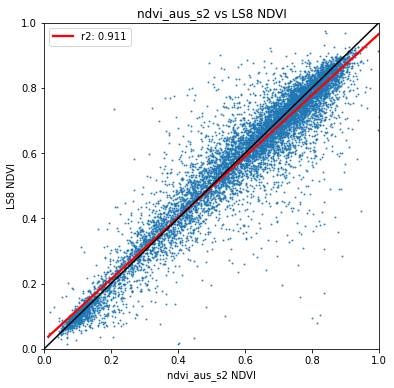

In [23]:
print(f'linear eq: NDVI_LS8 = {s:.3f}*ndvi_aus_s2 + {i:.3f}')
print("MAE: ", round(mae, 3))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x3, y=y, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,3)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('ndvi_aus_s2 NDVI')
ax.set_ylabel('LS8 NDVI')
ax.set_title('ndvi_aus_s2 vs LS8 NDVI');